# A - Classification with Numerical Data

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
os.chdir("C:/Users/sdoga/Desktop/Courses/Machine Learning/Assignment2")

## A - 1

In [136]:
# Load the train and test dataset
train = pd.read_csv("cover_train_numerical.csv")
test = pd.read_csv("cover_test_numerical.csv")

# X data - except for the label feature
X_train =  train.drop("label" ,axis= 1)
X_test = test.drop("label" , axis= 1)

# y data - label feature
y_train = train["label"]
y_test = test["label"]

## A - 2

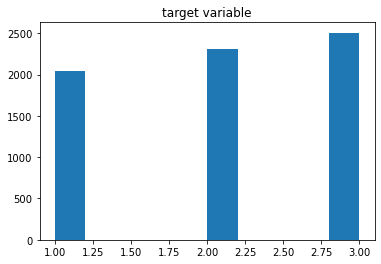

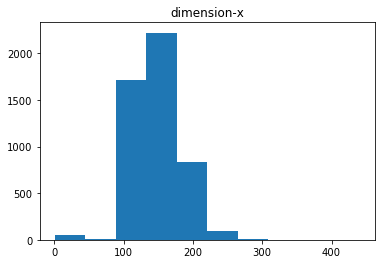

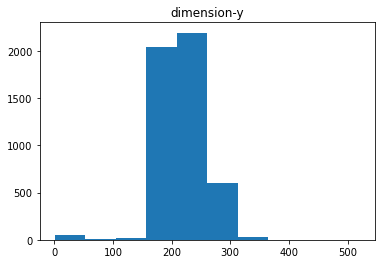

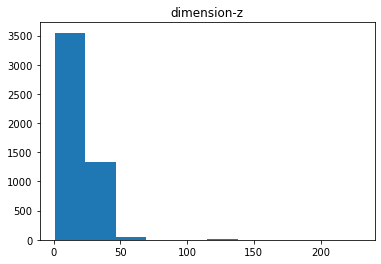

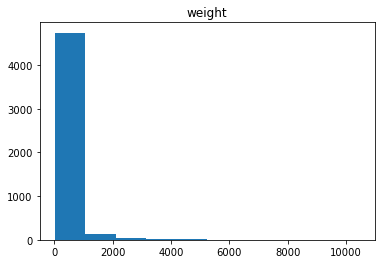

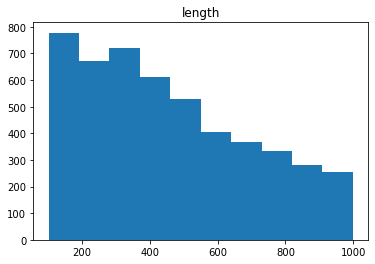

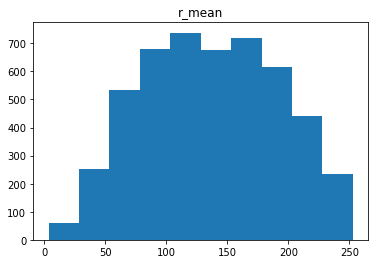

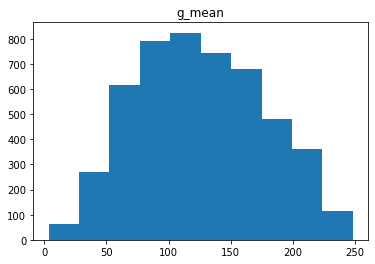

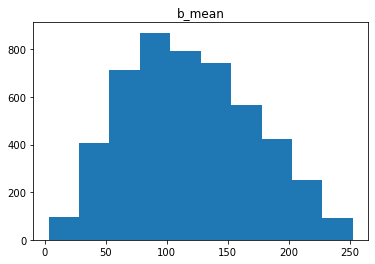

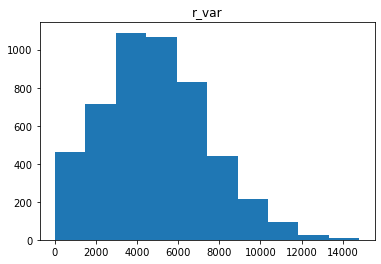

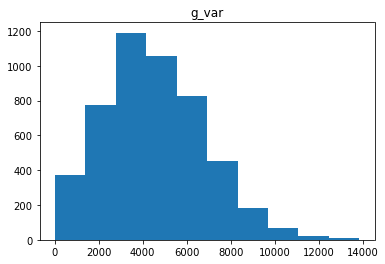

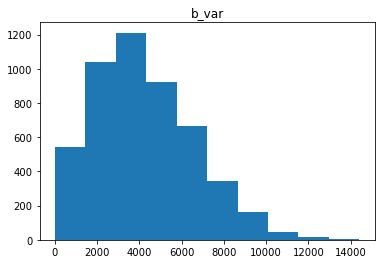

In [137]:
y = pd.concat((y_train, y_test))  # combine y_train and y_test
plt.figure()
plt.hist(y) # histogram of the target variable
plt.title("target variable")

for i in X_train.columns: # for all the features
    plt.figure()
    plt.hist(X_train[i]) # histogram of the feature
    plt.title(i)

In [138]:
final_table = [] # For Question D

## A - 3

In [139]:
# Grid Search for Logistic Regression

logreg = LogisticRegression(max_iter = 10000) 
param_grid = {"C":[0.0001, 0.01, 1, 100, 10000]} # 5 different C values
logreg_cv = GridSearchCV(logreg, param_grid,cv=5) # Grid Search for Logistic Regression

logreg_cv.fit(X_train,y_train) # Train the model

print("Logistic Regression Best hpyerparameters : {}".format(logreg_cv.best_params_))
print("Logistic Regression Best accuracy: {}".format(logreg_cv.best_score_))

Logistic Regression Best hpyerparameters : {'C': 100}
Logistic Regression Best accuracy: 0.6420838047477806


In [140]:
# New Logistic Regression model with the best hyperparameters

logreg = LogisticRegression(C=100, max_iter=10000 ) # Best C value
logreg.fit(X_train, y_train)
print("Accuracy on training data set: {}".format(logreg.score(X_train, y_train)))
print("Accuracy on test data set: {}".format(logreg.score(X_test, y_test)))

pred_test = logreg.predict(X_test)
pred_train = logreg.predict(X_train)

f1_train = f1_score(y_train, pred_train, average="weighted") # F1 score for the training data set
print("F1 score on training data set: {}".format(f1_train))
f1_test = f1_score(y_test, pred_test, average="weighted") # F1 score for the test data set
print("F1 score on test data set: {}".format(f1_test))

conf_matrx_train = confusion_matrix(y_train, pred_train) # Confusion matrix for the training data set
print("Confusion matrix on training data set: \n {}".format(conf_matrx_train))
conf_matrx_test = confusion_matrix(y_test, pred_test) # Confusion matrix for the test data set
print("Confusion matrix on test data set: \n {}".format(conf_matrx_test))

Accuracy on training data set: 0.6523934558675015
Accuracy on test data set: 0.6426315789473684
F1 score on training data set: 0.6386712975764451
F1 score on test data set: 0.6305125535577827
Confusion matrix on training data set: 
 [[ 494  624  331]
 [ 414 1158  101]
 [ 120  131 1578]]
Confusion matrix on test data set: 
 [[219 244 126]
 [183 407  44]
 [ 43  39 595]]


In [141]:
log_reg_table = {"algorithm" : "Logistic Regression", "data_used" : "cover_numerical", "parameters" : logreg_cv.best_params_, "accuracy" : logreg.score(X_test, y_test), "weighted F1 score" : f1_test}
final_table.append(log_reg_table) # Append the Logistic regression results to the final table

## A - 4

In [142]:
#Grid Search for SVM Classifier

svc = SVC()
param_grid = {"C":[0.0001, 0.01, 1, 100, 10000], "gamma" : ["scale", "auto"]} # different C and gamma values
svc_cv = GridSearchCV(svc, param_grid,cv=5)

svc_cv.fit(X_train,y_train)

print("SVM Classifier - Best hpyerparameters : {}".format(svc_cv.best_params_))
print("SVM Classifier - Best accuracy: {}".format(svc_cv.best_score_))

SVM Classifier - Best hpyerparameters : {'C': 10000, 'gamma': 'scale'}
SVM Classifier - Best accuracy: 0.7038934246603267


In [143]:
#Grid Search for KNN Classifier

knn = KNeighborsClassifier()
param_grid = {"n_neighbors": [3,5,10,12,15]} # different number of neighbors
knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X_train, y_train)

print("KNN Classifier - Best hpyerparameters : {}".format(knn_cv.best_params_))
print("KNN Classifier - Best accuracy: {}".format(knn_cv.best_score_))

KNN Classifier - Best hpyerparameters : {'n_neighbors': 12}
KNN Classifier - Best accuracy: 0.4811150862815848


In [144]:
# New SVM Classifier with the best hyperparameters

svc = SVC(C = 10000, gamma = 'scale') # Best C and gamma values
svc.fit(X_train, y_train)

print("Accuracy on training data set: {}".format(svc.score(X_train, y_train)))
print("Accuracy on test data set: {}".format(svc.score(X_test, y_test)))

pred_test = svc.predict(X_test)
pred_train = svc.predict(X_train)

f1_train =f1_score(y_train, pred_train, average="weighted") # F1 score for the training data set
print("F1 score on training data set: {}".format(f1_train))
f1_test = f1_score(y_test, pred_test, average="weighted") # F1 score for the test data set
print("F1 score on test data set: {}".format(f1_test))

conf_matrx_train = confusion_matrix(y_train, pred_train) # confusion matrix for the training data set
print("Confusion matrix on training data set: \n {}".format(conf_matrx_train))
conf_matrx_test = confusion_matrix(y_test, pred_test) # confusion matrix for the test data set
print("Confusion matrix on test data set: \n {}".format(conf_matrx_test))

Accuracy on training data set: 0.7731771359321349
Accuracy on test data set: 0.7042105263157895
F1 score on training data set: 0.7732776932606843
F1 score on test data set: 0.7038724546669545
Confusion matrix on training data set: 
 [[ 997  294  158]
 [ 377 1214   82]
 [ 139   73 1617]]
Confusion matrix on test data set: 
 [[386 137  66]
 [203 380  51]
 [ 65  40 572]]


In [145]:
svc_table = {"algorithm" : "SVC", "data_used" : "cover_numerical", "parameters" : svc_cv.best_params_, "accuracy" : svc.score(X_test, y_test), "weighted F1 score" : f1_test}
final_table.append(svc_table) # Append the SVC results to the final table

In [146]:
# New KNN Classifier with the best hyperparameters

knn = KNeighborsClassifier(n_neighbors = 12) # Best number of neighbors
knn.fit(X_train, y_train)

print("Accuracy on training data set: {}".format(knn.score(X_train, y_train)))
print("Accuracy on test data set: {}".format(knn.score(X_test, y_test)))

pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)

f1_train = f1_score(y_train, pred_train, average="weighted") # F1 score for the training data set
print("F1 score on training data set: {}".format(f1_train))
f1_test = f1_score(y_test, pred_test, average="weighted") # F1 score for the test data set
print("F1 score on test data set: {}".format(f1_test))

conf_matrx_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix on training data set: \n {}".format(conf_matrx_train)) # confusion matrix for the training data set
conf_matrx_test = confusion_matrix(y_test, pred_test)
print("Confusion matrix on test data set: \n {}".format(conf_matrx_test)) # confusion matrix for the test data set

Accuracy on training data set: 0.5942233892143002
Accuracy on test data set: 0.44
F1 score on training data set: 0.5929489587957374
F1 score on test data set: 0.43870446734055263
Confusion matrix on training data set: 
 [[ 722  257  470]
 [ 347  971  355]
 [ 320  260 1249]]
Confusion matrix on test data set: 
 [[206 156 227]
 [164 284 186]
 [185 146 346]]


In [147]:
knn_table = {"algorithm" : "KNN Classifier", "data_used" : "cover_numerical", "parameters" : knn_cv.best_params_, "accuracy" : knn.score(X_test, y_test), "weighted F1 score" : f1_test}
final_table.append(knn_table) # Append the KNN results to the final table

## A - 5

In [148]:
# Grid Search for Random Forest Classifier

rfclf = RandomForestClassifier()
param_grid = {"max_depth" : [3,5,10,15,20]}  # Different max depth values
rfclf_cv = GridSearchCV(rfclf, param_grid, cv=5)

rfclf_cv.fit(X_train, y_train)

print("Random Forest Classifier - Best hpyerparameters :{} ".format(rfclf_cv.best_params_))
print("Random Forest - Best accuracy: {}".format(rfclf_cv.best_score_))

Random Forest Classifier - Best hpyerparameters :{'max_depth': 20} 
Random Forest - Best accuracy: 0.826703360547962


In [149]:
# New Random Forest Classifier with the best hyperparameters

rfclf = RandomForestClassifier(max_depth = 20) # Best max depth value
rfclf.fit(X_train, y_train)

print("Accuracy on training data set: {}".format(rfclf.score(X_train, y_train)))
print("Accuracy on test data set: {}".format(rfclf.score(X_test, y_test)))

pred_test = rfclf.predict(X_test)
pred_train = rfclf.predict(X_train)

f1_train = f1_score(y_train, pred_train, average="weighted") # F1 score for the training data set
print("F1 score on training data set: {}".format(f1_train))
f1_test = f1_score(y_test, pred_test, average="weighted") # F1 score for the test data set
print("F1 score on test data set: {}".format(f1_test))

conf_matrx_train = confusion_matrix(y_train, pred_train) # confusion matrix for the training data set
print("Confusion matrix on training data set: \n {}".format(conf_matrx_train))
conf_matrx_test = confusion_matrix(y_test, pred_test) # confusion matrix for the test data set
print("Confusion matrix on test data set: \n {}".format(conf_matrx_test))

Accuracy on training data set: 1.0
Accuracy on test data set: 0.8142105263157895
F1 score on training data set: 1.0
F1 score on test data set: 0.814277257295554
Confusion matrix on training data set: 
 [[1449    0    0]
 [   0 1673    0]
 [   0    0 1829]]
Confusion matrix on test data set: 
 [[438 127  24]
 [ 85 501  48]
 [ 17  52 608]]


In [150]:
rfclf_table = {"algorithm" : "Random Forest Classifier", "data_used" : "cover_numerical", "parameters" : rfclf_cv.best_params_, "accuracy" : rfclf.score(X_test, y_test), "weighted F1 score" : f1_test}
final_table.append(rfclf_table) # Append the Random Forest results to the final table

In [151]:
# Grid Search for Gradient Boosting Classifier

gbclf = GradientBoostingClassifier()
param_grid = { "n_estimators" : [1,10,50,100,200] } # Different number of estimators
gbclf_cv = GridSearchCV(gbclf, param_grid, cv=5)

gbclf_cv.fit(X_train, y_train)

print("Gradient Boosting Classifier - Best hpyerparameters : {}".format(gbclf_cv.best_params_))
print("Gradient Boosting Classifier - Best accuracy: {}".format(gbclf_cv.best_score_))

Gradient Boosting Classifier - Best hpyerparameters : {'n_estimators': 100}
Gradient Boosting Classifier - Best accuracy: 0.8311482127021985


In [152]:
# New Gradient Boosting Classifier with the best hyperparameters

gbclf = GradientBoostingClassifier(n_estimators = 100)
gbclf.fit(X_train, y_train)

print("Accuracy on training data set: {}".format(gbclf.score(X_train, y_train)))
print("Accuracy on test data set: {}".format(gbclf.score(X_test, y_test)))

pred_test = gbclf.predict(X_test)
pred_train = gbclf.predict(X_train)

f1_train = f1_score(y_train, pred_train, average="weighted") # F1 score for the training data set
print("F1 score on training data set: {}".format(f1_train))
f1_test = f1_score(y_test, pred_test, average="weighted") # F1 score for the test data set
print("F1 score on test data set: {}".format(f1_test))

conf_matrx_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix on training data set: \n {}".format(conf_matrx_train)) # confusion matrix for the training data set
conf_matrx_test = confusion_matrix(y_test, pred_test)
print("Confusion matrix on test data set: \n {}".format(conf_matrx_test)) # confusion matrix for the test data set

Accuracy on training data set: 0.893758836598667
Accuracy on test data set: 0.8289473684210527
F1 score on training data set: 0.8938237574941755
F1 score on test data set: 0.8294272074393281
Confusion matrix on training data set: 
 [[1231  177   41]
 [ 106 1483   84]
 [  21   97 1711]]
Confusion matrix on test data set: 
 [[457 115  17]
 [ 84 510  40]
 [ 22  47 608]]


In [153]:
gbclf_table = {"algorithm" : "Gradient Boosting Classifier", "data_used" : "cover_numerical", "parameters" : gbclf_cv.best_params_, "accuracy" : gbclf.score(X_test, y_test), "weighted F1 score" : f1_test}
final_table.append(gbclf_table)

## A - 6

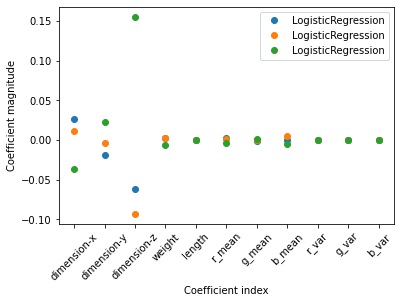

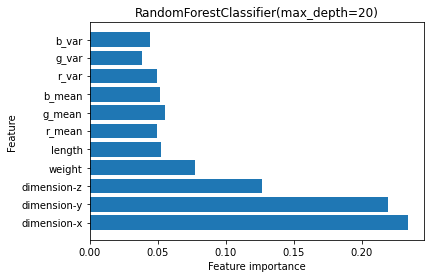

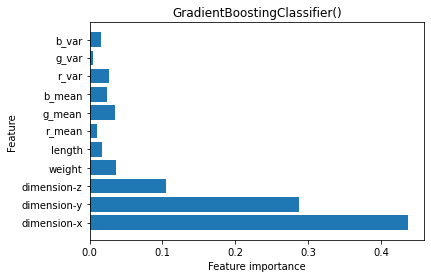

In [154]:
plt.figure()
plt.plot(logreg.coef_.T, 'o', label="LogisticRegression") # Plot the coefficients for the Logistic Regression solution
plt.xticks(ticks = range(X_train.shape[1]), labels = X_train.columns, rotation=45) # the features as x ticks
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') # Plot the feature importance
    plt.yticks(np.arange(n_features), X_train.columns) # the features as y ticks
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(model)
    
plt.figure()
plot_feature_importances(rfclf) # Plot the feature importance of Random Forests
    
plt.figure()
plot_feature_importances(gbclf) # Plot the feature importance of Gradient Boosting


# According to the plots, while Random Forest Classifier and Gradient Boosting Classifier give more importance on 
# dimension-x and dimension-y features, dimension-z is given more importance on Logistic Regression.

In [155]:
# Voting classifier with the best performing models (Random Forest & Gradient Boosting)
model = VotingClassifier(estimators=[('rfclf', rfclf), ('gbclf', gbclf)], voting='soft')
model.fit(X_train,y_train)

print("Voting Training score: {}".format(model.score(X_train, y_train)))
print("Voting Test score: {}".format(model.score(X_test, y_test)))

pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

f1_train = f1_score(y_train, pred_train, average="weighted") # F1 score for the training data set
print("F1 score on training data set: {}".format(f1_train))
f1_test = f1_score(y_test, pred_test, average="weighted") # F1 score for the test data set
print("F1 score on test data set: {}".format(f1_test))

conf_matrx_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix on training data set: \n {}".format(conf_matrx_train)) # confusion matrix for the training data set
conf_matrx_test = confusion_matrix(y_test, pred_test)
print("Confusion matrix on test data set: \n {}".format(conf_matrx_test)) # confusion matrix for the test data set

Voting Training score: 0.9656635023227631
Voting Test score: 0.828421052631579
F1 score on training data set: 0.9657103788239676
F1 score on test data set: 0.8287643956849744
Confusion matrix on training data set: 
 [[1365   63   21]
 [  12 1637   24]
 [   6   44 1779]]
Confusion matrix on test data set: 
 [[450 120  19]
 [ 84 512  38]
 [ 19  46 612]]


In [156]:
voting_table = {"algorithm" : "Voting Classifier", "data_used" : "cover_numerical", "parameters" : "estimators=[('rfclf', rfclf), ('gbclf', gbclf)], voting='soft'", "accuracy" : model.score(X_test, y_test), "weighted F1 score" : f1_test}
final_table.append(voting_table)

# B - Classification with Text Data

## B - 1

In [157]:
# Load the csv files
train = pd.read_csv("cover_train.csv")
test = pd.read_csv("cover_test.csv")

# y data - label feature
y_train = train["label"]
y_test = test["label"]

# X data - except for the label feature
X_train = train["description"] + train["title"]
X_test =  test["description"] + test["title"]

## B - 2

In [158]:
# Transform the data to a Bag-of-Words representation
countvect = CountVectorizer(stop_words='english', min_df = 2)
X_train_counts = countvect.fit_transform(X_train.values)
X_test_counts = countvect.transform(X_test.values)

# Rescale the data using TD-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

## B - 3

In [159]:
# Train a SVC classifier 
svc =  SVC().fit(X_train_tfidf, y_train)

print("Accuracy on the training data set: {}".format(svc.score(X_train_tfidf,y_train)))
print("Accuracy on the test data set: {}".format(svc.score(X_test_tfidf,y_test)))

pred_test = svc.predict(X_test_tfidf)
pred_train = svc.predict(X_train_tfidf)

f1_train = f1_score(y_train, pred_train, average="weighted") # F1 score for the training data set
print("F1 score on training data set: {}".format(f1_train))
f1_test = f1_score(y_test, pred_test, average="weighted") # F1 score for the test data set
print("F1 score on test data set: {}".format(f1_test))

conf_matrx_train = confusion_matrix(y_train, pred_train) # Confusion matrix for the training data set
print("Confusion matrix on training data set: \n {}".format(conf_matrx_train))
conf_matrx_test = confusion_matrix(y_test, pred_test) # Confusion matrix for the test data set
print("Confusion matrix on test data set: \n {}".format(conf_matrx_test))

Accuracy on the training data set: 0.9993940618056958
Accuracy on the test data set: 0.9252631578947368
F1 score on training data set: 0.9993941403934138
F1 score on test data set: 0.9253749361432567
Confusion matrix on training data set: 
 [[1447    0    2]
 [   0 1672    1]
 [   0    0 1829]]
Confusion matrix on test data set: 
 [[520   8  61]
 [ 34 583  17]
 [ 21   1 655]]


In [160]:
tfidf_table = {"algorithm" : "SVC - tfidf_Transformer", "data_used" : "cover text (title&description)", "parameters" : "min_df = 2, stop_words='english'", "accuracy" : svc.score(X_test_tfidf,y_test), "weighted F1 score" : f1_test}
final_table.append(tfidf_table)

# C - Classification with Image Data

## C - 1

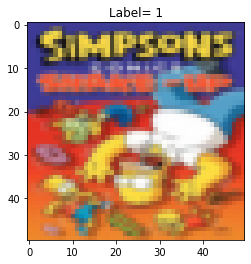

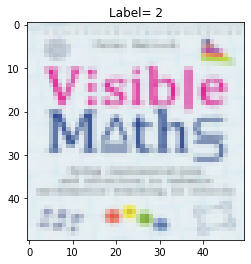

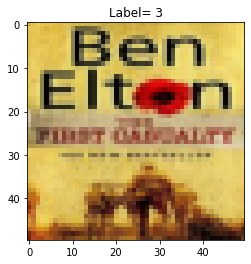

<Figure size 432x288 with 0 Axes>

In [161]:
# Load the files of book cover images
train = np.load("cover_train.npz")
test = np.load("cover_test.npz")

# Assign X data
X_train = train["X"]
X_test = test["X"]

# Assign y data
y_train = train["y"]
y_test = test["y"]

# Display an image from each label.
labels = set(y_train)

for i in labels:
    for img,label in zip(X_train, y_train):
        if label == i:
            plt.imshow(np.reshape(img, (50,50,3)))
            plt.title("Label= {}".format(label))
            plt.figure()
            break

## C - 2

In [162]:
# Run a PCA algorithm on the dataset
pca = PCA(n_components=1000).fit(np.concatenate((X_train, X_test))) # selected number of components is 1000
print('explained variance ratio for n_components = 1000: {}'.format(sum(pca.explained_variance_ratio_))) # the total explained 
# variance ratio

# Apply the dimensionality reduction on X
X_train_r = pca.transform(X_train)
X_test_r = pca.transform(X_test)

explained variance ratio for n_components = 1000: 0.9764858007876466


## C - 3

In [163]:
# Train a SVC classifier
svc = SVC().fit(X_train_r, y_train)

print("Accuracy on the training data set: {}".format(svc.score(X_train_r,y_train)))
print("Accuracy on the test data set: {}".format(svc.score(X_test_r,y_test)))

pred_test = svc.predict(X_test_r)
pred_train = svc.predict(X_train_r)

f1_train = f1_score(y_train, pred_train, average="weighted") # F1 score for the training data set
print("F1 score on training data set: {}".format(f1_train))
f1_test = f1_score(y_test, pred_test, average="weighted") # F1 score for the test data set
print("F1 score on test data set: {}".format(f1_test))

conf_matrx_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix on training data set: \n {}".format(conf_matrx_train)) # confusion matrix for the training data set
conf_matrx_test = confusion_matrix(y_test, pred_test)
print("Confusion matrix on test data set: \n {}".format(conf_matrx_test)) # confusion matrix for the test data set


Accuracy on the training data set: 0.7743890123207433
Accuracy on the test data set: 0.37315789473684213
F1 score on training data set: 0.7740744280672422
F1 score on test data set: 0.41158398943801183
Confusion matrix on training data set: 
 [[1070  144  235]
 [ 152 1256  265]
 [ 158  163 1508]]
Confusion matrix on test data set: 
 [[ 62  91  98]
 [119 110 174]
 [324 385 537]]


In [164]:
pca_table = {"algorithm" : "SVC - PCA", "data_used" : "cover images", "parameters" : "{n_components = 1000}", "accuracy" : svc.score(X_test_r,y_test), "weighted F1 score" : f1_test}
final_table.append(pca_table)

# D - Summary table and good coding standards

Please include a summary table of all your results in a csv file. The table should include the algorithm used, the data used, the hyperparameter, accuracy and weighted f1 score. You can create this table automatically or by manually.

In [165]:
final_table = pd.DataFrame(final_table)
print(final_table)
final_table.to_csv("C:/Users/sdoga/Desktop/Courses/Machine Learning/Assignment2/final_table.csv", index = False)

                      algorithm                       data_used  \
0           Logistic Regression                 cover_numerical   
1                           SVC                 cover_numerical   
2                KNN Classifier                 cover_numerical   
3      Random Forest Classifier                 cover_numerical   
4  Gradient Boosting Classifier                 cover_numerical   
5             Voting Classifier                 cover_numerical   
6       SVC - tfidf_Transformer  cover text (title&description)   
7                     SVC - PCA                    cover images   

                                          parameters  accuracy  \
0                                         {'C': 100}  0.642632   
1                     {'C': 10000, 'gamma': 'scale'}  0.704211   
2                                {'n_neighbors': 12}  0.440000   
3                                  {'max_depth': 20}  0.814211   
4                              {'n_estimators': 100}  0.828947   


# E - Additional solutions to improve your weighted F1-score

In [166]:
# Stop words are set to english and min_df is set to 2 at Question B-2

In [167]:
# Voting classifier was used to combine the best classifiers in Question A which are Random Forest and Gradient Boosting.